## ipls原理

区间偏最小二乘法将整个光谱区域划分为多个等宽的子区间， 假设为n个； 在每个子区间上进行偏最小二乘回归，建立待测品质的"局部回归模型"，也就是可以得到n个局部回归模型；以均方根无误差MSE值为各模型的精度衡量标准，取精度最高的局部模型所在的子区间为特征波段。


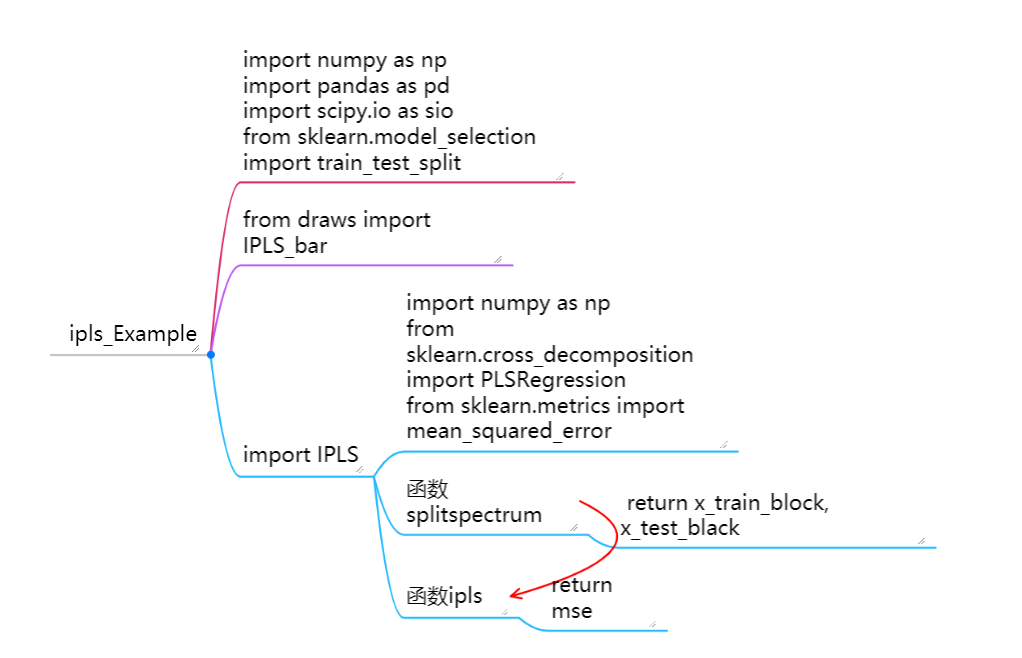

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn.model_selection import train_test_split
from draws import IPLS_bar
import IPLS

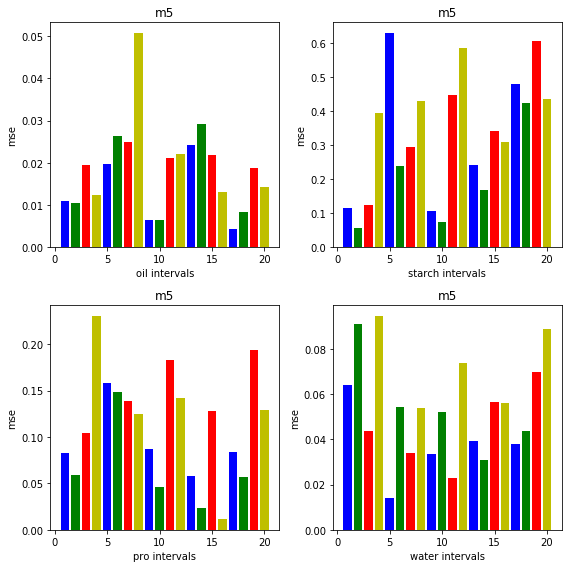

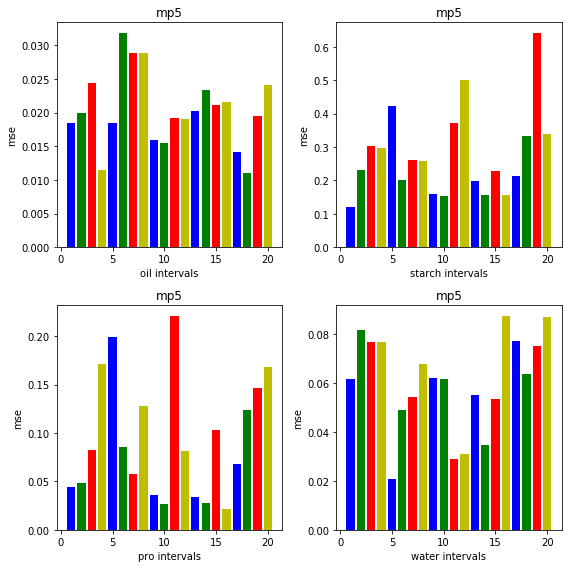

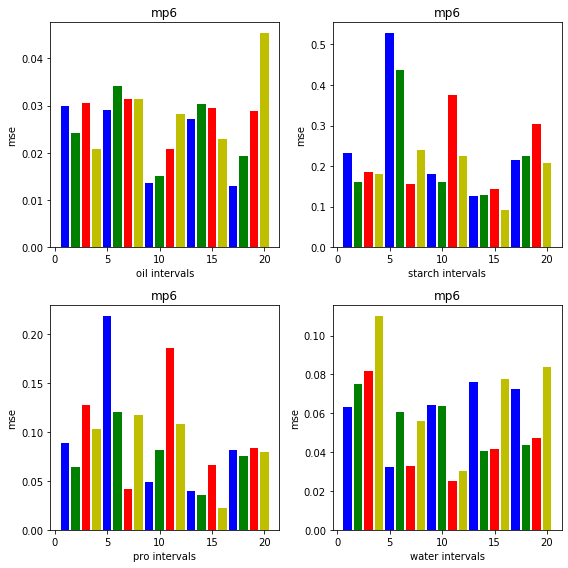

In [2]:
if __name__ == '__main__':

    mat = sio.loadmat(r'E:\Documents\DAY\cornmat.mat')
    X = ('m5','mp5','mp6')
    Y = ('oil', 'starch', 'pro', 'water')
    intervals = 20
    for a in X:
        intervals_list = []
        mse_list = []
        for b in Y: 
            x = mat[a]
            y = mat[b]
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
            mse = IPLS.ipls(intervals, x_train, x_test, y_train, y_test)
            mse_list.append(mse)
        #print(a)
        IPLS_bar(a,Y,intervals,mse_list)